## <u> Client Segmentation </u>

This notebook develops customer segmentation based on default risk using the predicted probabilities from the LightGBM model built in `01_modelling.ipynb`. The analysis segments customers into risk tiers and profiles the characteristics that define each group, providing actionable insights for credit evaluation, pricing strategy, and portfolio management at Home Credit.

### <u> 1. Setup</u>

In [2]:
# Import necessary libraries
import pandas as pd, sys
import matplotlib.pyplot as plt
import numpy as np


# Set root directory for personal module
sys.path.append('..')

In [18]:
# Import dataframe along with model predictions
home_credit = pd.read_csv('../data/processed/home_credit_final.csv', index_col=0)
model_preds = pd.read_csv('../data/processed/model_predictions.csv', index_col=0)


# Merge feature with model prediction
home_credit_ext = home_credit.merge(right = model_preds, right_index = True, left_index = True, how = 'left')
home_credit_ext.head(5)


,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,YEARS_EMPLOYED,YEARS_BIRTH,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,YEARS_LAST_PHONE_CHANGE,...,AMT_ANNUITY,prev_cnt_revolving_refused,prev_has_history,prev_cnt_revolving_canceled,prev_cnt_cash_refused,TARGET,actual,predicted_probability,predicted_class,split
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
149977,0.567379,NaN,0.318931,13.8,47.1,Laborers,Industry: type 7,Working,0,5.3,...,37800.0,0,1,0,0,0,0,0.054080,0,train
149261,0.197475,0.37669,0.121854,1.2,35.7,Private service staff,Self-employed,Working,1,0.2,...,27652.5,0,1,0,1,1,1,0.290842,1,train
451117,NaN,NaN,0.162192,24.2,42.3,Laborers,Industry: type 11,Working,0,2.4,...,11101.5,0,1,0,0,0,0,0.075496,0,train
452063,0.248536,NaN,0.548223,2.7,37.2,Sales staff,Trade: type 7,Working,0,1.7,...,24232.5,0,1,2,2,0,0,0.104458,1,train
246378,0.401407,NaN,0.565295,1.6,48.9,Not Provided,Business Entity Type 3,Working,0,6.2,...,37017.0,4,1,2,2,0,0,0.173561,1,train


### <u> 2. Segmentation</u>

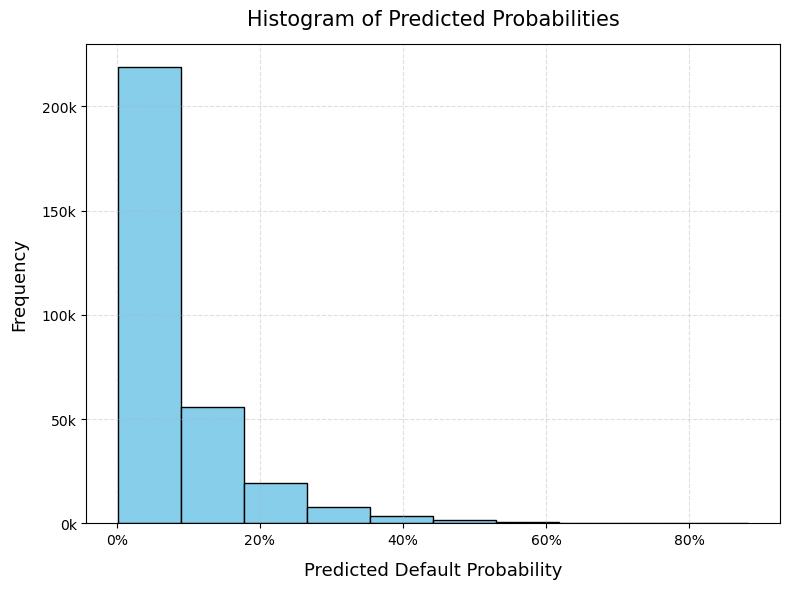

In [42]:
home_credit_ext['predicted_probability'].hist(bins=10, figsize=(8,6), color='skyblue', edgecolor='black')
plt.title('Histogram of Predicted Probabilities', fontsize=15, pad= 14)
plt.xlabel('Predicted Default Probability', fontsize=13, labelpad=10)
plt.ylabel('Frequency', fontsize=13, labelpad=10)
ax = plt.gca()
ax.yaxis.set_major_formatter(lambda x, pos: f'{int(x/1000)}k')
ax.xaxis.set_major_formatter(lambda x, pos: f'{x*100:.0f}%')
plt.grid(linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
# Define risk bins based on predicted probabilities of default
bins = [0, 0.05, 0.10, 0.2, 1.0]
labels = ['Very Low Risk', 'Low Risk', 'Medium Risk', 'High Risk']

# Segment customers into risk categories
home_credit_ext['risk_segment'] = pd.cut(home_credit_ext['predicted_probability'], bins=bins, labels=labels, include_lowest=True)
home_credit_ext[['predicted_probability', 'risk_segment']].head(3)

,predicted_probability,risk_segment
SK_ID_CURR,,
149977,0.054080,Low Risk
149261,0.290842,High Risk
451117,0.075496,Low Risk


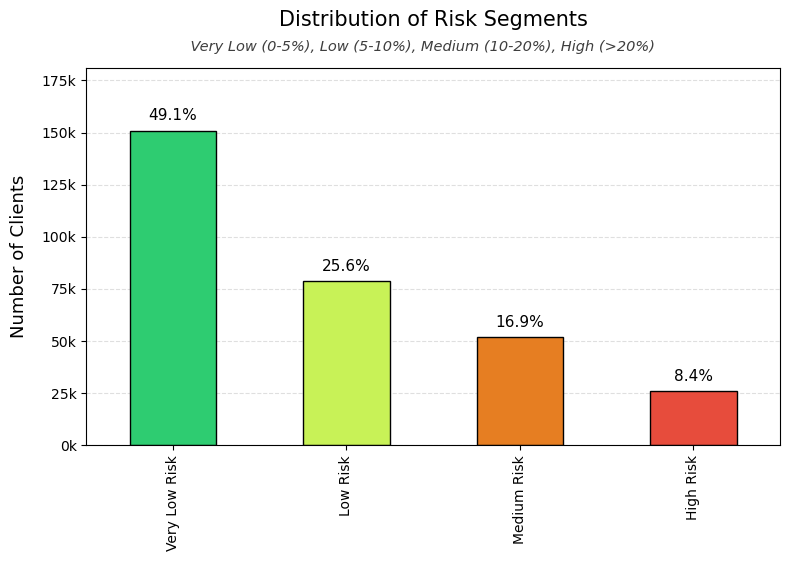

In [98]:
# Risk palette
risk_colors = ['#2ecc71', "#c8f257", '#e67e22', '#e74c3c']

home_credit_ext['risk_segment'].value_counts().plot(kind='bar', figsize=(8,6), color=risk_colors, edgecolor='black', zorder=2)
plt.title('Distribution of Risk Segments', fontsize=15, pad=30)
plt.suptitle('            Very Low (0-5%), Low (5-10%), Medium (10-20%), High (>20%)', 
             fontsize=10.5, y=0.877, style='italic', ha='center', color= "#3E3E3E")

plt.ylabel('Number of Clients', fontsize=13, labelpad=10)
plt.xlabel('', labelpad=10)
ax = plt.gca()
ax.yaxis.set_major_formatter(lambda x, pos: f'{int(x/1000)}k')
plt.ylim(0, home_credit_ext['risk_segment'].value_counts().max() * 1.2)

# Inlcude percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/len(home_credit_ext)*100:.1f}%', 
                (p.get_x() + p.get_width() / 2, height+ 3500), 
                ha='center', va='bottom', fontsize=11, )

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('../images/risk_segment_distribution.png', dpi=600, bbox_inches='tight')
plt.show()